**Exercise 5**
One combined spatial enhancement methods (e.g. arithmetic operations, gray level
transformations, and/or sharpening spatial filters) to convert “image_1” to “image_2”.
a) Try to guess the processing steps she adopted. [Note the dynamic range and brightness of
the enhanced image, and the noise introduced.]
b) Propose a pipeline of processes with the aim of approximating “image_1” starting from
“image_2”. 

(<Axes: title={'center': 'target Image'}>,
 (-0.5, 799.5, 640.5, -0.5),
 Text(0.5, 1.0, 'target Image'))

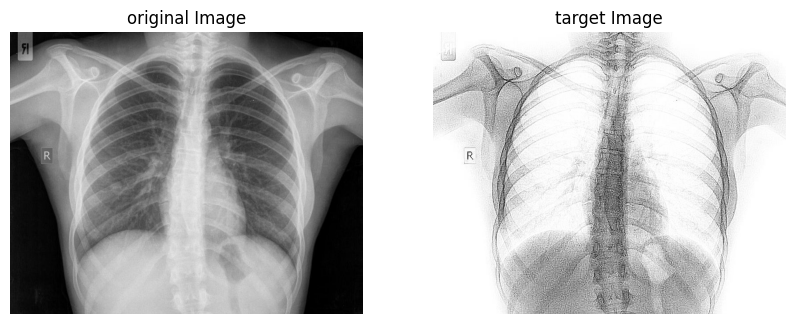

In [ ]:
from PIL import Image
import cv2
from IPython.display import display # to display images
import numpy as np


from matplotlib import pyplot as plt
image1 = cv2.imread("image_1.jpg",1)
image2 = cv2.imread("image_2.jpg",1)

fig, axes = plt.subplots(1, 2, figsize=(10,10))
plt.subplot(121), plt.imshow(image1),plt.axis('off'),plt.title('original Image')
plt.subplot(122), plt.imshow(image2),plt.axis('off'),plt.title('target Image')


As we notice the target image is brighter than the original one, so we apply the a process called gamma correction, and it is used to adjust the perceived brightness or intensity of an image. Gamma correction is a nonlinear operation that adjusts the pixel values in an image based on a specified gamma value

the gamma_correction() function performs gamma correction on an input image using the specified gamma value. It calculates the inverse gamma value, builds a lookup table to map the input pixel values to their adjusted gamma values, and then applies the gamma correction using the lookup table.

The gamma value determines the amount of correction to be applied. A gamma value less than 1.0 will darken the image, while a value greater than 1.0 will brighten it. By adjusting the gamma value, you can control the overall brightness and contrast of the image.

In [ ]:
def gamma_correction(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

since we want the image to be brighter we apply a value of gamma bigger than 1

(<Axes: title={'center': 'Gamma = 3'}>,
 (-0.5, 799.5, 640.5, -0.5),
 Text(0.5, 1.0, 'Gamma = 3'))

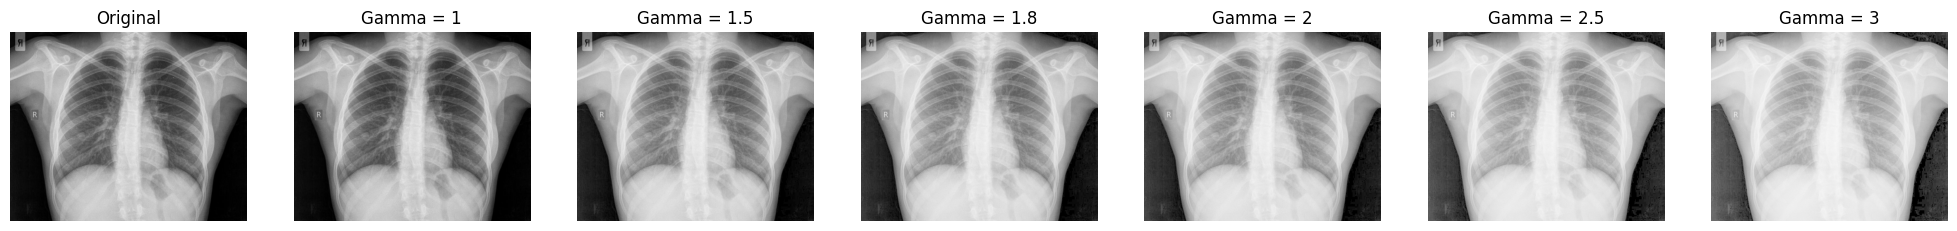

In [ ]:
fig, axes = plt.subplots(1, 7, figsize=(25,100))
plt.subplot(1, 7, 1), plt.imshow(image1), plt.axis('off'), plt.title('Original')

gamma = 1
adjusted1 = gamma_correction(image1, gamma=gamma)
plt.subplot(1, 7, 2), plt.imshow(adjusted1), plt.axis('off'), plt.title('Gamma = 1')

gamma = 1.5
adjusted2 = gamma_correction(image1, gamma=gamma)
plt.subplot(1, 7, 3), plt.imshow(adjusted2), plt.axis('off'), plt.title('Gamma = 1.5')

gamma = 1.8
adjusted3 = gamma_correction(image1, gamma=gamma)
plt.subplot(1, 7, 4), plt.imshow(adjusted3), plt.axis('off'), plt.title('Gamma = 1.8')

gamma = 2
adjusted4 = gamma_correction(image1, gamma=gamma)
plt.subplot(1, 7, 5), plt.imshow(adjusted4), plt.axis('off'), plt.title('Gamma = 2')

gamma = 2.5
adjusted5 = gamma_correction(image1, gamma=gamma)
plt.subplot(1, 7, 6), plt.imshow(adjusted5), plt.axis('off'), plt.title('Gamma = 2.5')

gamma = 3
adjusted6 = gamma_correction(image1, gamma=gamma)
plt.subplot(1, 7, 7), plt.imshow(adjusted6), plt.axis('off'), plt.title('Gamma = 3')


from observation we can guess the better value of gamma is 2.5


The complement of a grayscale image is its photographic negative. as we notice from the image and the target that the dark area in the original is bright area in the target, that why we apply first the subtraction.
Negative values are clipped to 0.

<ipython-input-26-e575dc77e2ba>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(image1, cmap='gray'), plt.axis('off')
<ipython-input-26-e575dc77e2ba>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(122), plt.imshow(res, cmap='gray'), plt.axis('off')


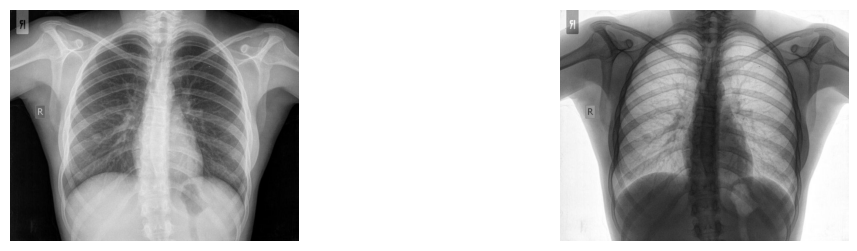

In [ ]:
res = (255-image1)

fig, axes = plt.subplots(1, 3, figsize=(13,3))

plt.subplot(121), plt.imshow(image1, cmap='gray'), plt.axis('off')
plt.subplot(122), plt.imshow(res, cmap='gray'), plt.axis('off')
plt.show()

after applying the subtraction we apply the gamma correction function on the output of the previous step (complement of a grayscale output).

(<Axes: title={'center': 'target'}>,
 (-0.5, 799.5, 640.5, -0.5),
 Text(0.5, 1.0, 'target'))

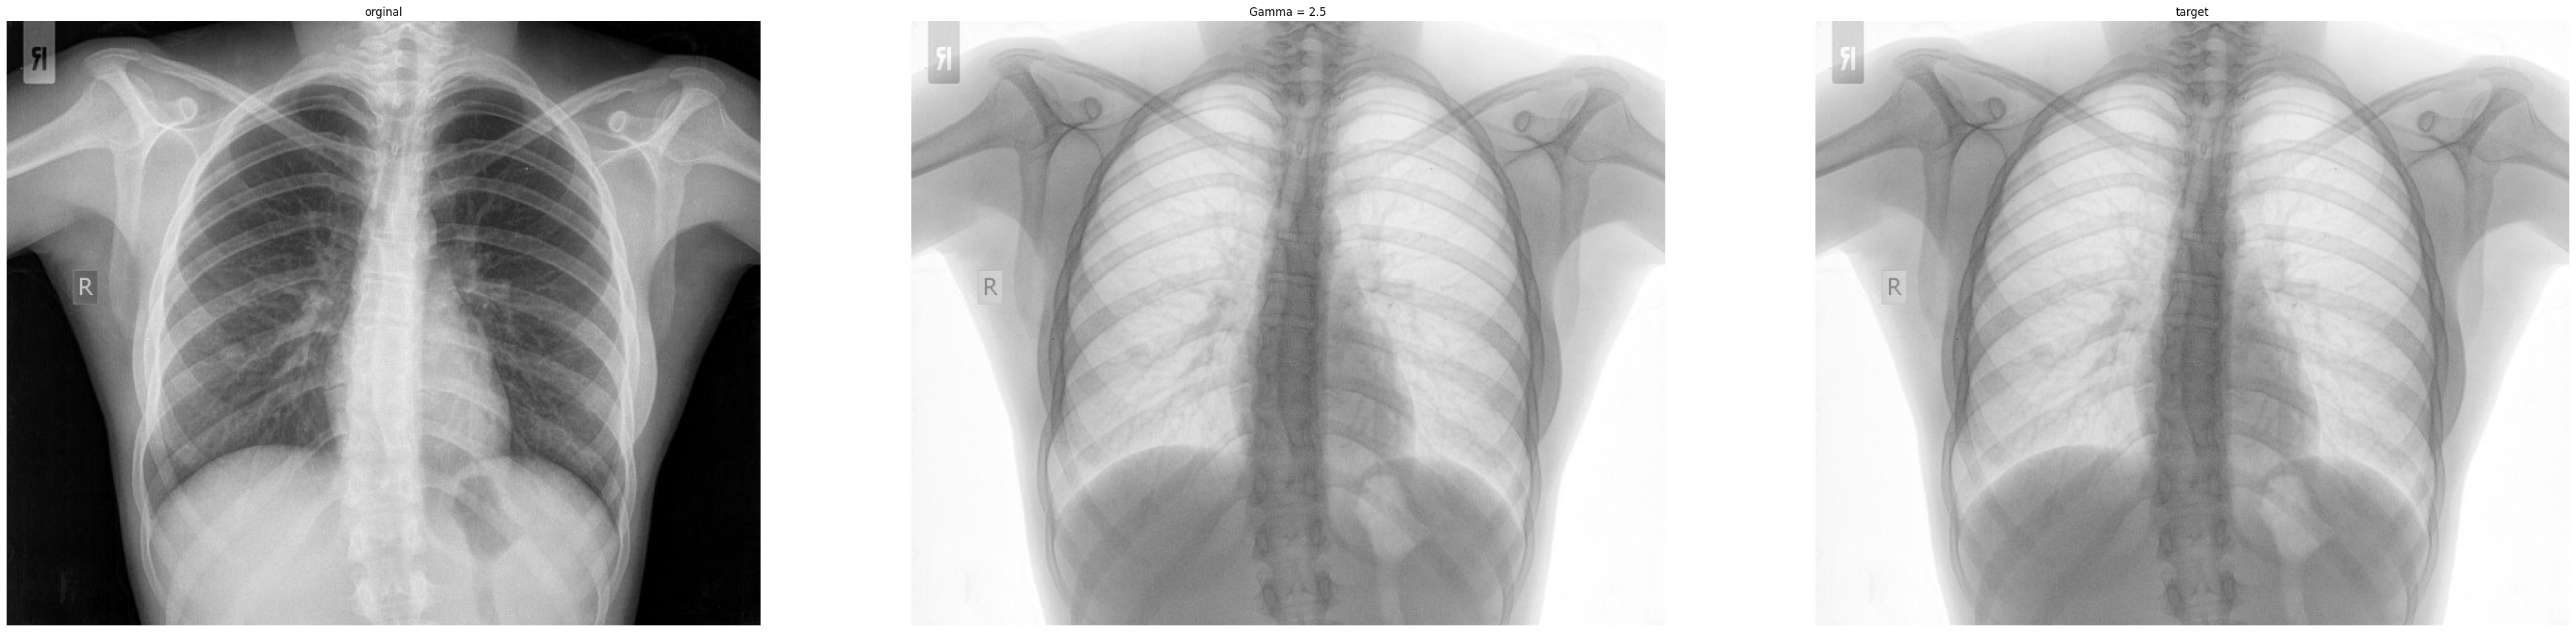

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(50,100))
gamma = 2.5
adjusted3 = gamma_correction(res, gamma=gamma)
plt.subplot(1, 3, 1), plt.imshow(image1), plt.axis('off'), plt.title('orginal')
plt.subplot(1, 3, 2), plt.imshow(adjusted3), plt.axis('off'), plt.title('Gamma = 2.5')
plt.subplot(1, 3, 3), plt.imshow(adjusted3), plt.axis('off'), plt.title('target')

as we observe the output image from the two previous setp so much a like the target one .

In [ ]:
#the proposed pipeline is
def image_pipeline(image, gamma):
  res = (255-image)
  adjusted3 = gamma_correction(res, gamma=gamma)
  plt.subplot(1, 2, 1), plt.imshow(image1), plt.axis('off'), plt.title('orginal')
  plt.subplot(1, 2, 2), plt.imshow(adjusted3), plt.axis('off'), plt.title(f'Gamma = {gamma}')
 

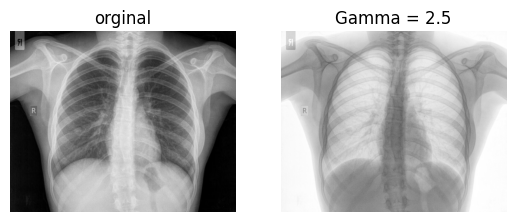

In [ ]:
image_pipeline(image1, 2.5)